In [1]:
import json
import yaml
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
config = yaml.safe_load(open("/gscratch/balazinska/enhaoz/VOCAL-UDF/configs/config.yaml", "r"))
import re
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

######## llm_labels ########
llm_f1=0.8627450980392157
llm_f1=0.8113207547169812
llm_f1=0.9142857142857143
llm_f1=0.8037383177570093
llm_f1=0.8545454545454545
llm_f1=0.9019607843137255
llm_f1=0.9230769230769231
llm_f1=0.8846153846153846
llm_f1=0.8653846153846154
llm_f1=0.9230769230769231
llm_f1=0.7450980392156863
llm_f1=0.7155963302752294
llm_f1=0.6078431372549019
llm_f1=0.7102803738317757
llm_f1=0.6728971962616822
llm_f1=0.9230769230769231
llm_f1=0.9158878504672897
llm_f1=0.8484848484848485
llm_f1=0.8712871287128713
llm_f1=0.9259259259259259
llm_f1=0.7692307692307693
llm_f1=0.8070175438596491
llm_f1=0.803921568627451
llm_f1=0.8113207547169812
llm_f1=0.8037383177570093
llm_f1=0.9306930693069307
llm_f1=0.912621359223301
llm_f1=0.9245283018867925
llm_f1=0.9411764705882353
llm_f1=0.9423076923076923
######## balanced_gpt4v_balanced_three_clip ########
test_f1=0.7837837934494019
test_f1=0.7620889544487
test_f1=0.6662216186523438
test_f1=0.6875675916671753
test_f1=0.7206551432609558
test_f1=

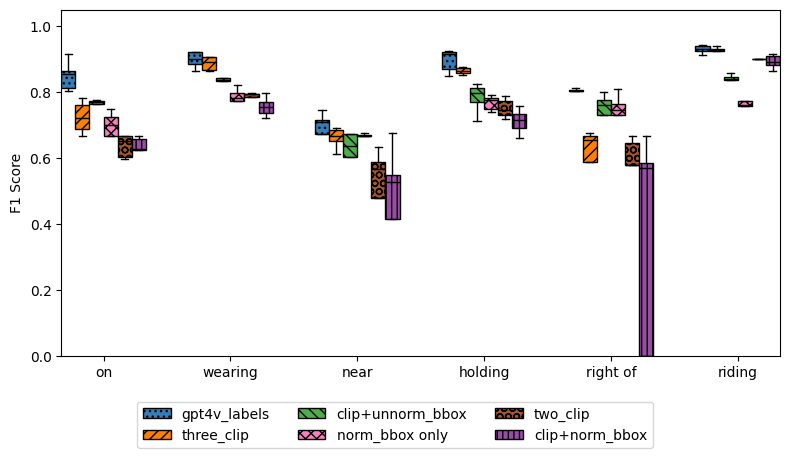

In [18]:
def plot():
    dataset = "gqa"
    udfs = ["on", "wearing", "near", "holding", "to_the_right_of", "riding"]
    labels = ["on", "wearing", "near", "holding", "right of", "riding"]
    methods = [
        "llm_labels",
        "balanced_gpt4v_balanced_three_clip",
        "balanced_gpt4v_balanced_clip_unnorm_bbox",
        "balanced_gpt4v_balanced_norm_bbox_only",
        "balanced_gpt4v_balanced_two_clip",
        "balanced_gpt4v_balanced_clip_norm_bbox",
    ]
    legend_names = [
        "gpt4v_labels",
        "three_clip",
        "clip+unnorm_bbox",
        "norm_bbox only",
        "two_clip",
        "clip+norm_bbox",
    ]
    # Create a figure and axis for the boxplot
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # Adjust the figsize as needed

    hatch_patterns = ["...", "///", "\\\\\\", "xxx", "OO", "|||", "+++"]
    handles_f1 = []

    for i, method in enumerate(methods):
        print(f"######## {method} ########")
        test_f1_list = []
        # Iterate through LLM models
        for udf_class in udfs:
            test_f1_data = []
            # Iterate through runs and questions
            for run_id in range(5):
                if method == "llm_labels":
                    with open(
                        os.path.join(
                            config["log_dir"],
                            "llm_labels_relationship",
                            dataset,
                            "balanced_gpt4v_balanced_three_clip",
                            f"udf-{udf_class}_run-{run_id}_ntrain-100.log",
                        ),
                        "r",
                    ) as f:
                        # read all lines
                        lines = f.readlines()
                        for line in lines:
                            if "llm_f1" in line:
                                llm_f1 = re.search(r"llm_f1: (\d+\.\d+)", line).group(1)
                                break
                        print(f"llm_f1={llm_f1}")
                        test_f1_data.append(float(llm_f1))
                else:
                    try:
                        with open(
                            os.path.join(
                                config["log_dir"],
                                "llm_labels_relationship",
                                dataset,
                                method,
                                f"udf-{udf_class}_run-{run_id}_ntrain-100.log",
                            ),
                            "r",
                        ) as f:
                            # read all lines
                            lines = f.readlines()
                            test_f1 = re.search(
                                r"test_f1: (\d+\.\d+)", lines[-1]
                            ).group(1)
                            print(f"test_f1={test_f1}")
                            test_f1_data.append(float(test_f1))
                    except Exception as e:
                        print(method, f"udf-{udf_class}_run-{run_id}_ntrain-100.log")
                        print(e)
            test_f1_list.append(test_f1_data)

        bp_f1 = ax.boxplot(
            test_f1_list,
            positions=np.array(range(len(test_f1_list))) * (len(methods) * 1.5) + i,
            sym=".",
            widths=1,
            showfliers=False,
            patch_artist=True,
            boxprops=dict(facecolor=CB_color_cycle[i], hatch=hatch_patterns[i]),
            medianprops=dict(color="black"),
        )

        handles_f1.append(bp_f1["boxes"][0])

    # Customize the plot labels and legend
    ax.set(ylabel="F1 Score")
    # ax.set(xlabel="UDF class")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xticks(
        np.arange(
            len(methods) / 2 - 0.5,
            (len(udfs) - 1) * (len(methods) * 1.5) + len(methods) / 2,
            len(methods) * 1.5,
        )
    )
    ax.set_xticklabels(labels)
    fig.legend(
        handles_f1,
        legend_names,
        prop={"size": 10},
        loc="upper center",
        bbox_to_anchor=(0.5, 0.0),
        fancybox=True,
        shadow=False,
        ncol=3,
    )
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.show()


plot()

######## gpt4v ########
llm_f1=0.8627450980392157
llm_f1=0.8113207547169812
llm_f1=0.9142857142857143
llm_f1=0.8037383177570093
llm_f1=0.8545454545454545
llm_f1=0.9019607843137255
llm_f1=0.9230769230769231
llm_f1=0.8846153846153846
llm_f1=0.8653846153846154
llm_f1=0.9230769230769231
llm_f1=0.7450980392156863
llm_f1=0.7155963302752294
llm_f1=0.6078431372549019
llm_f1=0.7102803738317757
llm_f1=0.6728971962616822
llm_f1=0.9230769230769231
llm_f1=0.9158878504672897
llm_f1=0.8484848484848485
llm_f1=0.8712871287128713
llm_f1=0.9259259259259259
llm_f1=0.7692307692307693
llm_f1=0.8070175438596491
llm_f1=0.803921568627451
llm_f1=0.8113207547169812
llm_f1=0.8037383177570093
llm_f1=0.9306930693069307
llm_f1=0.912621359223301
llm_f1=0.9245283018867925
llm_f1=0.9411764705882353
llm_f1=0.9423076923076923
######## llava_v1.6_mistral_7b ########
llm_f1=0.7017543859649122
llm_f1=0.6949152542372882
llm_f1=0.7547169811320755
llm_f1=0.7317073170731707
llm_f1=0.6829268292682927
llm_f1=0.7076923076923077
ll

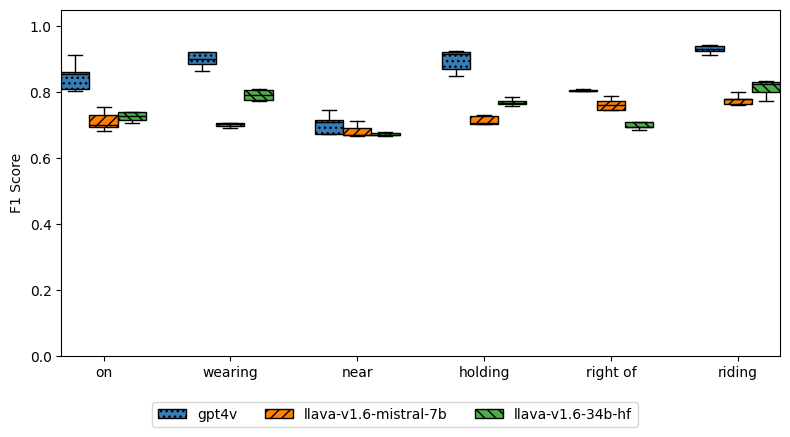

In [3]:
def plot_llm_labels():
    dataset = "gqa"
    udfs = ["on", "wearing", "near", "holding", "to_the_right_of", "riding"]
    labels = ["on", "wearing", "near", "holding", "right of", "riding"]
    methods = ["gpt4v", "llava_v1.6_mistral_7b", "llava-v1.6-34b-hf"]
    legend_names = ["gpt4v", "llava-v1.6-mistral-7b", "llava-v1.6-34b-hf"]
    # Create a figure and axis for the boxplot
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # Adjust the figsize as needed

    hatch_patterns = ["...", "///", "\\\\\\", "xxx", "OO", "|||", "+++"]
    handles_f1 = []

    for i, method in enumerate(methods):
        print(f"######## {method} ########")
        test_f1_list = []
        # Iterate through LLM models
        for udf_class in udfs:
            test_f1_data = []
            # Iterate through runs and questions
            for run_id in range(5):
                with open(
                    os.path.join(
                        config["log_dir"],
                        "llm_labels_relationship",
                        dataset,
                        f"balanced_{method}_balanced_three_clip",
                        f"udf-{udf_class}_run-{run_id}_ntrain-100.log",
                    ),
                    "r",
                ) as f:
                    # read all lines
                    lines = f.readlines()
                    for line in lines:
                        if "llm_f1" in line:
                            llm_f1 = re.search(r"llm_f1: (\d+\.\d+)", line).group(1)
                            break
                    print(f"llm_f1={llm_f1}")
                    test_f1_data.append(float(llm_f1))
            test_f1_list.append(test_f1_data)

        bp_f1 = ax.boxplot(
            test_f1_list,
            positions=np.array(range(len(test_f1_list))) * (len(methods) * 1.5) + i,
            sym=".",
            widths=1,
            showfliers=False,
            patch_artist=True,
            boxprops=dict(facecolor=CB_color_cycle[i], hatch=hatch_patterns[i]),
            medianprops=dict(color="black"),
        )

        handles_f1.append(bp_f1["boxes"][0])

    # Customize the plot labels and legend
    ax.set(ylabel="F1 Score")
    # ax.set(xlabel="UDF class")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xticks(
        np.arange(
            len(methods) / 2 - 0.5,
            (len(udfs) - 1) * (len(methods) * 1.5) + len(methods) / 2,
            len(methods) * 1.5,
        )
    )
    ax.set_xticklabels(labels)
    fig.legend(
        handles_f1,
        legend_names,
        prop={"size": 10},
        loc="upper center",
        bbox_to_anchor=(0.5, 0.0),
        fancybox=True,
        shadow=False,
        ncol=3,
    )
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.show()


plot_llm_labels()